In [1]:
import numpy as np

from robspy.synthacc import API
from synthacc.recordings import Accelerogram, plot_seismograms

In [2]:
api = API()

In [3]:
c = api.get_catalog().query(region=(2.5, 7.0, 49.5, 51.5), min_date=2008, min_magnitude=2.7)

In [4]:
print(len(c))

for e in c:
    print(e.key, e.name, e.lon, e.lat, e.time, e.mag)

9
3069 COURT-SAINT-ETIENNE (BE) 4.5767 50.6323 2008-07-13 13:45:49.96 3.2
3273 COURT-SAINT-ETIENNE (BE) 4.5728 50.6325 2009-03-03 03:23:32.64 2.8
3501 ZUTENDAAL (BE) 5.5603 50.915 2009-08-05 21:18:36.72 2.7
4823 MONTFORT (NL) 5.9672 51.1397 2013-01-20 18:26:32.62 2.7
5324 SPA (BE) 5.873 50.4617 2015-05-13 15:23:56.08 2.9
5573 NOERVENICH (DE) 6.6098 50.7978 2016-11-04 10:10:33.91 2.8
5990 HUERTH (DE) 6.866 50.8715 2017-11-08 16:40:40.80 2.8
6505 DUEREN (DE) 6.5312 50.8597 2018-04-21 11:47:47.31 2.7
6625 KINROOI (BE) 5.6872 51.175 2018-05-25 22:43:27.08 3.1


In [5]:
e = api.get_event(5324)
s_time = e.time + 4
e_time = s_time + 9

#e = api.get_event(6505)
#s_time = e.time + 5
#e_time = s_time + 20

In [6]:
print(e.time)

2015-05-13 15:23:56.08


In [7]:
r_vel = api.get_recording('MEMH', s_time, e_time, channels='H*')

C:\Miniconda3\envs\phd_py36\lib\site-packages\obspy\signal\detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


7.195412814734089e-05


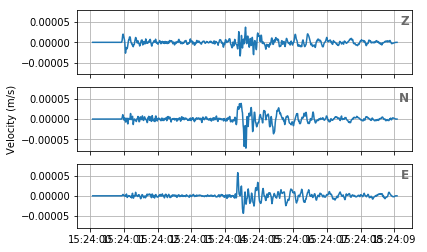

In [8]:
print(r_vel.pgm)
r_vel.plot()

In [9]:
r_acc = r_vel.differentiate()

0.003608235965770003


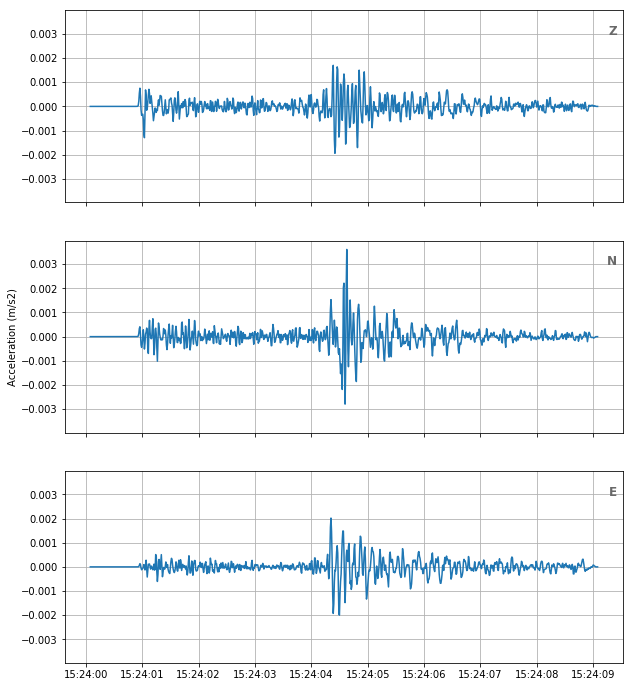

In [10]:
print(r_acc.pgm)
r_acc.plot(size=(10, 12))

In [11]:
acc_z = Accelerogram.from_seismogram(r_acc.get_component('Z'))
acc_n = Accelerogram.from_seismogram(r_acc.get_component('N'))
acc_e = Accelerogram.from_seismogram(r_acc.get_component('E'))

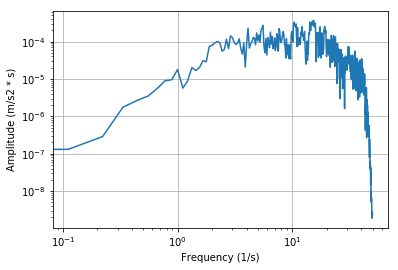

In [12]:
acc_z.fas.plot()

In [13]:
print(acc_n.pgm)
print(acc_e.pgm)

0.003608235965770003
0.002019816283156716


In [14]:
acc = acc_n
#acc = acc_e

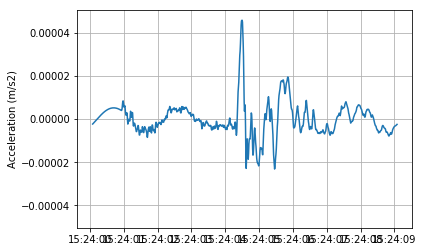

In [15]:
acc.get_response(2).plot()

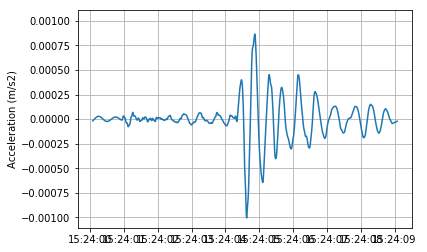

In [16]:
acc.get_response(0.5).plot()

0.05722367659350217 17.47528400007684


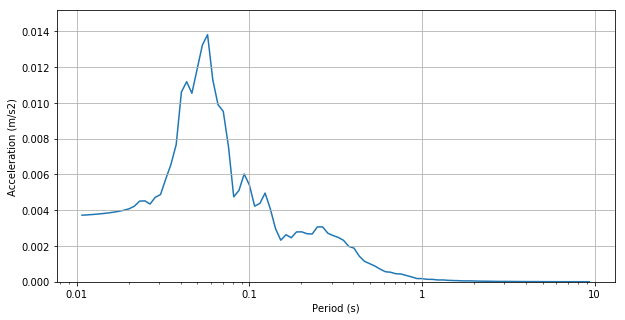

In [17]:
periods = np.logspace(-2, 1, 100)

rs = acc.get_response_spectrum(periods, gmt='acc')

max_response_period = rs.max_response_period
print(max_response_period, 1/max_response_period)

rs.plot(size=(10, 5))

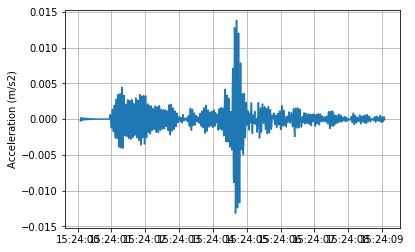

In [18]:
max_response = acc.get_response(max_response_period)
max_response.plot()

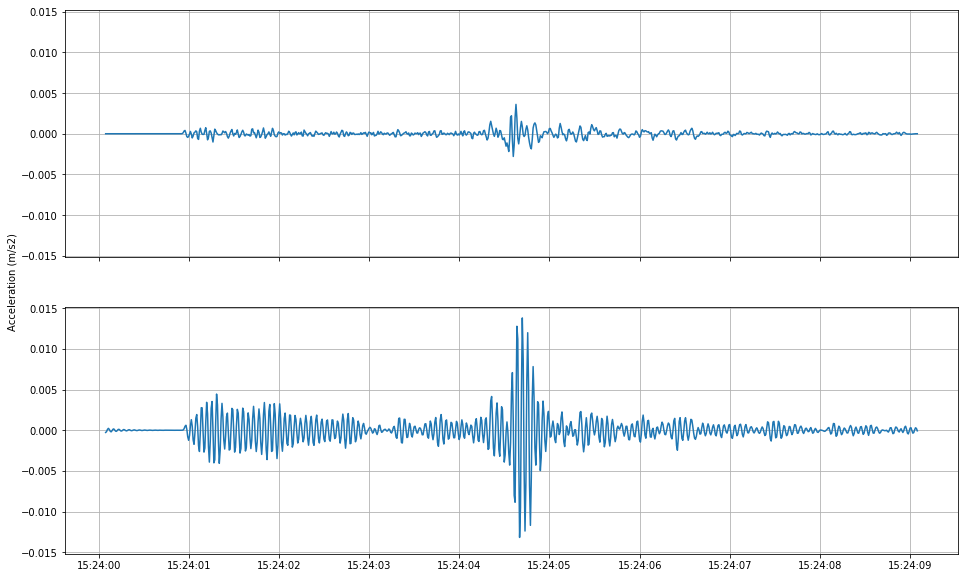

In [19]:
plot_seismograms([[acc], [max_response]], size=(16, 10))

In [20]:
## Test for Thierry

e1 = api.get_event(5324)
s_time1 = e1.time
e_time1 = s_time1 + 13

e2 = api.get_event(6505)
s_time2 = e2.time
e_time2 = s_time2 + 25

r_vel1 = api.get_recording('MEMH', s_time1, e_time1, channels='H*')
r_vel2 = api.get_recording('MEMH', s_time2, e_time2, channels='H*')

r_acc1 = r_vel1.differentiate()
r_acc2 = r_vel2.differentiate()

acc_z1 = Accelerogram.from_seismogram(r_acc1.get_component('Z'))
acc_n1 = Accelerogram.from_seismogram(r_acc1.get_component('N'))
acc_e1 = Accelerogram.from_seismogram(r_acc1.get_component('E'))

acc_z2 = Accelerogram.from_seismogram(r_acc2.get_component('Z'))
acc_n2 = Accelerogram.from_seismogram(r_acc2.get_component('N'))
acc_e2 = Accelerogram.from_seismogram(r_acc2.get_component('E'))

periods = np.array([0.03, 0.06, 0.1, 0.2, 1])
acc_z1_rs = acc_z1.get_response_spectrum(periods, gmt='acc')
acc_n1_rs = acc_n1.get_response_spectrum(periods, gmt='acc')
acc_e1_rs = acc_e1.get_response_spectrum(periods, gmt='acc')

acc_z2_rs = acc_z2.get_response_spectrum(periods, gmt='acc')
acc_n2_rs = acc_n2.get_response_spectrum(periods, gmt='acc')
acc_e2_rs = acc_e2.get_response_spectrum(periods, gmt='acc')

np.set_printoptions(suppress=True)

print(acc_z1_rs.get_responses(unit='m/s2'))
print(acc_n1_rs.get_responses(unit='m/s2'))
print(acc_e1_rs.get_responses(unit='m/s2'))

print(acc_z2_rs.get_responses(unit='m/s2'))
print(acc_n2_rs.get_responses(unit='m/s2'))
print(acc_e2_rs.get_responses(unit='m/s2'))

C:\Miniconda3\envs\phd_py36\lib\site-packages\obspy\signal\detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


[0.00259558 0.00821129 0.00505924 0.0021189  0.00008619]
[0.00499327 0.01165812 0.00540683 0.002795   0.00016982]
[0.00260406 0.00566889 0.00789415 0.00208907 0.00011321]
[0.00043723 0.0011425  0.00059372 0.00091765 0.00004447]
[0.00049278 0.00085817 0.00094799 0.00058262 0.0000731 ]
[0.00044142 0.00107299 0.0007681  0.00064145 0.00005069]
